### dev control group

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
from clean_questions import *

#### make qsidp for painquestion

Extracting questionnaire and idp from uk_biobank director and save to a csv, download and move to bmrc for classifier.

In [5]:
data_dir = '/vols/Data/pain/asdahl/uk_biobank/suyi_extend/pain_questionnaire'

In [4]:
idp_path = os.path.join(data_dir, 'qsidp_subjs_control_allvisits_extended.tsv')
df_idp = pd.read_csv(idp_path, sep='\t')

/home/fs0/syzhang/.conda/envs/bbk/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (863,869) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
df_idp.shape

(26490, 2861)

In [8]:
df_bmrc = pd.read_csv('./subjs_bmrc/label_painquestion.csv')

In [10]:
df_bmrc.shape

(10837, 2)

In [11]:
df_qsidp_filtered = df_idp[df_idp['eid'].isin(df_bmrc['eid'])]

In [12]:
df_qsidp_filtered.shape

(10837, 2861)

In [13]:
df_q_f_d = df_qsidp_filtered.drop_duplicates(subset=['eid'])

In [14]:
df_q_f_d.shape

(10837, 2861)

In [15]:
df_q_f_d.to_csv('./data/qsidp_painquestion.csv',index=None)

#### make qsidp for paincontrol

In [3]:
df_disease = pd.read_csv('./data/qsidp_patients_pain.csv')

/home/fs0/syzhang/.conda/envs/bbk/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (863,867) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
df_disease.shape

(3363, 2861)

In [4]:
df_control = pd.read_csv('./data/qsidp_pain_minus.csv')

/home/fs0/syzhang/.conda/envs/bbk/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (863) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
df_control.shape

(26328, 2861)

In [10]:
df_qsidp = pd.concat([df_disease, df_control], axis=0)

In [11]:
df_qsidp.shape

(29691, 2861)

In [5]:
pain_matched_bmrc = pd.read_csv('./subjs_bmrc/label_paincontrol.csv')

In [16]:
pain_matched_bmrc.shape

(4558, 3)

In [17]:
df_qsidp_filtered = df_qsidp[df_qsidp['eid'].isin(pain_matched_bmrc['eid'])]

In [18]:
df_qsidp_filtered.shape

(6833, 2861)

In [19]:
df_q_f_d = df_qsidp_filtered.drop_duplicates(subset=['eid'])

In [20]:
df_q_f_d.shape

(4558, 2861)

In [21]:
df_q_f_d.to_csv('./data/qsidp_paincontrol.csv',index=None)

#### extract controls for bmrc pain patient exmult

In [6]:
disease = pd.read_csv('./subjs_bmrc/subjs_patients_pain_exmult.csv')

In [7]:
disease_eid = disease['eid']

In [8]:
df_disease = pd.read_csv('./data/qsidp_patients_pain.csv')

/home/fs0/syzhang/.conda/envs/bbk/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (863,867) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [16]:
df_disease_filtered = df_disease[df_disease['eid'].isin(disease_eid)]

In [17]:
df_disease.shape

(3363, 2861)

In [18]:
df_disease_filtered.shape

(2280, 2861)

In [19]:
control = pd.read_csv('./subjs_bmrc/subjs_pain_minus_matched.csv')

In [20]:
control_eid = control['eid']

In [27]:
control_eid.shape

(14423,)

In [22]:
df_control = pd.read_csv('./data/qsidp_pain_minus.csv')

/home/fs0/syzhang/.conda/envs/bbk/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (863) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [23]:
df_control.shape

(26328, 2861)

In [28]:
df_control_filtered = df_control[df_control['eid'].isin(control_eid)]

In [32]:
df_control_filtered = df_control_filtered.drop_duplicates('eid')

In [33]:
df_control_filtered.shape

(14423, 2861)

In [34]:
# find matched controls
from compare_control import extract_control
df_matched = extract_control(df_control=df_control_filtered, 
                             df_disease=df_disease_filtered, save_csv=False)

In [36]:
df_verify = df_control_filtered[df_control_filtered['eid'].isin(df_matched)]

In [38]:
df_verify.shape

(2278, 2861)

In [40]:
df_verify['31-0.0'].mean()

0.3617208077260755

In [42]:
df_verify['21003-2.0'].mean()

63.1352063213345

In [43]:
df_disease_filtered['31-0.0'].mean()

0.3618421052631579

In [44]:
df_disease_filtered['21003-2.0'].mean()

63.11929824561403

In [49]:
df_matched_save = pd.DataFrame({'eid':df_matched}, dtype=int)

In [51]:
df_matched_save.to_csv('./subjs_bmrc/subjs_patients_pain_matched_exmult.csv', index=None)

In [53]:
matched_bmrc = control[control['eid'].isin(df_matched)]

In [56]:
matched_bmrc.to_csv('./subjs_bmrc/subjs_bmrc_patients_pain_matched_exmult.csv', index=None)

In [58]:
disease['label'] = 1

In [60]:
matched_bmrc['label'] = 0

<ipython-input-60-385b960dde27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_bmrc['label'] = 0


In [61]:
matched_bmrc

,eid,bmrc,label
0,1018925,5482415,0
1,1049209,4882883,0
2,1046782,1695643,0
3,1050966,3809395,0
4,1046987,3925954,0
...,...,...,...
3902,2724329,3991928,0
4000,2821813,1221950,0
4063,3737039,1969312,0
4069,3749908,1638666,0


In [62]:
pain_matched_bmrc = pd.concat([disease, matched_bmrc])

In [65]:
pain_matched_bmrc.to_csv('./subjs_bmrc/label_paincontrol.csv', index=None)

In [70]:
pain_control_bmrc = pain_matched_bmrc['bmrc'].rename('eid')

In [71]:
pain_control_bmrc.to_csv('./subjs_bmrc/subjs_paincontrol.csv', index=None)

#### create label for digestive

In [3]:
df = pd.read_csv('../funpack_cfg/qsidp_subjs_digestive_imaging.tsv', sep='\t')

/home/fs0/syzhang/.conda/envs/biobank/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2441,2442,2443,2444,2445,2446,2447,2448,2449,2450,2451,2452,2453,2454,2455,2456,2457,2499,2500,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559,2560,2561,2562,2563,2564,2565,2566,2567,2568,2569,2570,2571,2572,2573,2574,2575,2576,2577,2578,2579,2580,2581,2582,2583,2584,2585,2586,2587,2588,2589,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599,2600,2601,2602,2603,2604,2605,2606,2607,2742,2743,2810,2811,2812,2813,2814,2815,2816,2817,2818,2819,2820,2821,2822,2823,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833,2834,2835,2836,2837,2838,2839,2840,2841,2842,2843,2844,2845,2846,2847,2848,2849,2850,2851,2852,2853,2854,2855,2856,2857,2858,2859,2860,2861,2862,2863,2864,2865,2866,2867,3000,3001,3002,3003,3004) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
def pain_label(df, label_type='severe'):
    """create pain label based on digestive qs"""
    # load digestive qs
    qs = load_qscode(questionnaire='digestive', idp=None)
    dfq = extract_qs(df, df_questionnaire=qs, visits=[2])
    # pain label
    if label_type == 'severe': # only include bothered a lot
        dfq['label'] = [
            (dfq['21027-0.0']==1) | # Abdominal discomfort/pain for 6 months or longer
            (dfq['21035-0.0']==1) | # Currently (in last 3 months) suffer from abdominal pain
            (dfq['21048-0.0']==-602) | # Degree bothered by back pain in the past 3 months
            (dfq['21052-0.0']==-602) | # Degree bothered by chest pain in the last 3 months
            (dfq['21051-0.0']==-602) | # Degree bothered by headaches in the last 3 months
            (dfq['21049-0.0']==-602) | # Degree bothered by pain in arms/legs/joints in the past 3 months
            (dfq['21057-0.0']==-602) # Degree bothered by pain/problems during intercourse in the last 3 months
        ][0].astype(int)
    elif label_type == 'mild': # include bothered a little
        dfq['label'] = [
            (dfq['21027-0.0']==1) | # Abdominal discomfort/pain for 6 months or longer
            (dfq['21035-0.0']==1) | # Currently (in last 3 months) suffer from abdominal pain
            (dfq['21048-0.0']!=-600) | # Degree bothered by back pain in the past 3 months
            (dfq['21052-0.0']!=-600) | # Degree bothered by chest pain in the last 3 months
            (dfq['21051-0.0']!=-600) | # Degree bothered by headaches in the last 3 months
            (dfq['21049-0.0']!=-600) | # Degree bothered by pain in arms/legs/joints in the past 3 months
            (dfq['21057-0.0']!=-600) # Degree bothered by pain/problems during intercourse in the last 3 months
        ][0].astype(int)
    elif label_type == 'severe_wide': # include bothered a little
        dfq['label'] = [
            (dfq['21027-0.0']==1) | # Abdominal discomfort/pain for 6 months or longer
            (dfq['21035-0.0']==1) | # Currently (in last 3 months) suffer from abdominal pain
            (dfq['21048-0.0']==-602) | # Degree bothered by back pain in the past 3 months
            (dfq['21052-0.0']==-602) | # Degree bothered by chest pain in the last 3 months
            (dfq['21051-0.0']==-602) | # Degree bothered by headaches in the last 3 months
            (dfq['21049-0.0']==-602) | # Degree bothered by pain in arms/legs/joints in the past 3 months
            (dfq['21057-0.0']==-602) | # Degree bothered by pain/problems during intercourse in the last 3 months
            (dfq['21048-0.0']==-601) | # Degree bothered by back pain in the past 3 months
            (dfq['21052-0.0']==-601) | # Degree bothered by chest pain in the last 3 months
            (dfq['21051-0.0']==-601) | # Degree bothered by headaches in the last 3 months
            (dfq['21049-0.0']==-601) | # Degree bothered by pain in arms/legs/joints in the past 3 months
            (dfq['21057-0.0']==-601) # Degree bothered by pain/problems during intercourse in the last 3 months
        ][0].astype(int)
    return dfq

In [10]:
dfl = pain_label(df, label_type='severe')
1-dfl['label'].sum()/dfl.shape[0]

0.6874209060997216

In [29]:
dfl = pain_label(df, label_type='severe')
dfl['label'].sum()/dfl.shape[0]

0.31257909390027844

In [9]:
dfl = pain_label(df, label_type='severe_wide')
dfl['label'].sum()/dfl.shape[0]

0.8038471273095419

In [6]:
dfl = pain_label(df, label_type='mild')
dfl['label'].sum()/dfl.shape[0]

0.853454821564161

In [7]:
def pain_wideness(df):
    """construct a measure of pain widespreadness"""
    # load digestive qs
    qs = load_qscode(questionnaire='digestive', idp=None)
    dfq = extract_qs(df, df_questionnaire=qs, visits=[2])
    # pain wideness
    return dfq

In [30]:
dfq = pain_wideness(df)

In [15]:
from predict_digestive import *
dff_imputed = load_digestive_data(label_type='severe', questionnaire=None, 
                                  idp='taskfmri', question_visits=[2], imputed=False)

/home/fs0/syzhang/.conda/envs/biobank/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (2441,2442,2443,2444,2445,2446,2447,2448,2449,2450,2451,2452,2453,2454,2455,2456,2457,2499,2500,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559,2560,2561,2562,2563,2564,2565,2566,2567,2568,2569,2570,2571,2572,2573,2574,2575,2576,2577,2578,2579,2580,2581,2582,2583,2584,2585,2586,2587,2588,2589,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599,2600,2601,2602,2603,2604,2605,2606,2607,2742,2743,2810,2811,2812,2813,2814,2815,2816,2817,2818,2819,2820,2821,2822,2823,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833,2834,2835,2836,2837,2838,2839,2840,2841,2842,2843,2844,2845,2846,2847,2848,2849,2850,2851,2852,2853,2854,2855,2856,2857,2858,2859,2860,2861,2862,2863,2864,2865,2866,2867,3000,3001,3002,3003,3004) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


(3951, 3797)


In [28]:
dff_imputed.loc[0].dtype==

dtype('float64')

In [20]:
from predict_digestive import *
dff_imputed = load_digestive_data(label_type='severe', questionnaire=None, 
                                  idp='t1vols', question_visits=[2], imputed=False)

/home/fs0/syzhang/.conda/envs/biobank/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (2441,2442,2443,2444,2445,2446,2447,2448,2449,2450,2451,2452,2453,2454,2455,2456,2457,2499,2500,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559,2560,2561,2562,2563,2564,2565,2566,2567,2568,2569,2570,2571,2572,2573,2574,2575,2576,2577,2578,2579,2580,2581,2582,2583,2584,2585,2586,2587,2588,2589,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599,2600,2601,2602,2603,2604,2605,2606,2607,2742,2743,2810,2811,2812,2813,2814,2815,2816,2817,2818,2819,2820,2821,2822,2823,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833,2834,2835,2836,2837,2838,2839,2840,2841,2842,2843,2844,2845,2846,2847,2848,2849,2850,2851,2852,2853,2854,2855,2856,2857,2858,2859,2860,2861,2862,2863,2864,2865,2866,2867,3000,3001,3002,3003,3004) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


(3951, 3797)


In [21]:
dff_imputed.columns

Index(['eid', '25007-2.0', '25004-2.0', '25009-2.0', '25005-2.0', '25006-2.0',
       '25025-2.0', '25001-2.0', '25010-2.0', '25003-2.0', '25008-2.0',
       '25000-2.0', '25002-2.0', 'label'],
      dtype='object')

In [22]:
dff_imputed.isna().sum()

eid          0
25007-2.0    0
25004-2.0    0
25009-2.0    0
25005-2.0    0
25006-2.0    0
25025-2.0    0
25001-2.0    0
25010-2.0    0
25003-2.0    0
25008-2.0    0
25000-2.0    0
25002-2.0    0
label        0
dtype: int64

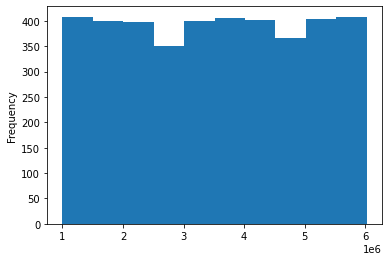

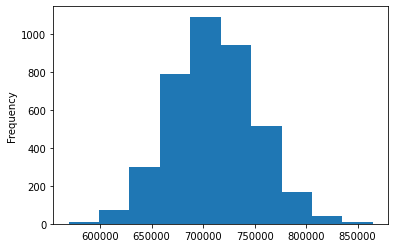

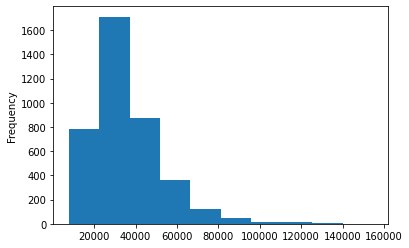

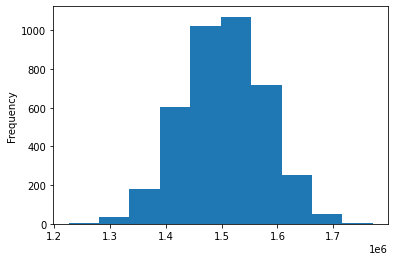

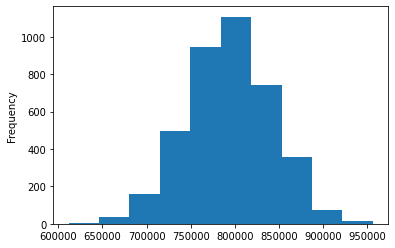

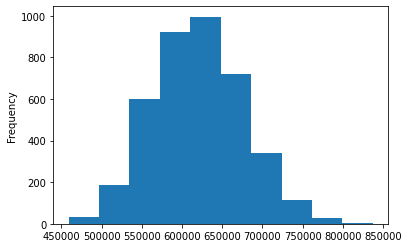

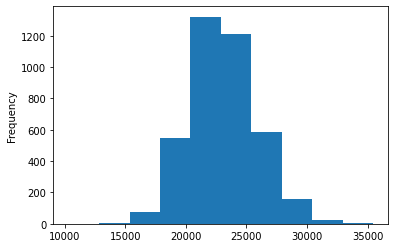

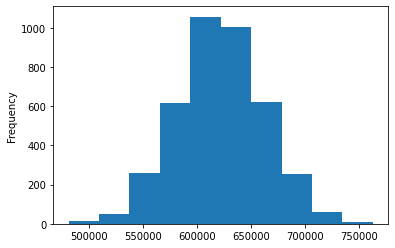

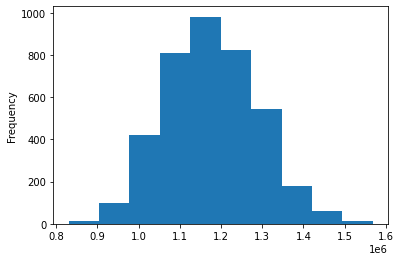

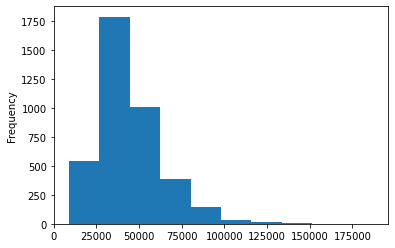

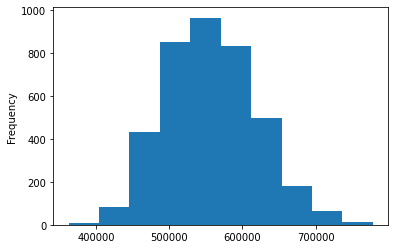

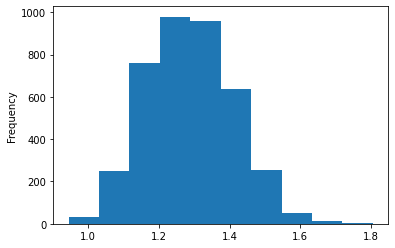

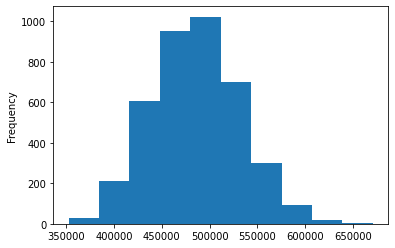

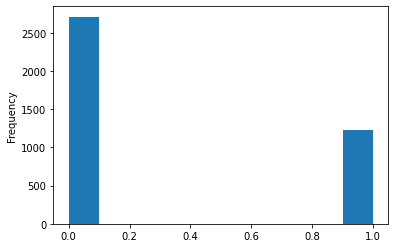

In [23]:
for c in dff_imputed.columns:
    plt.subplots()
    dff_imputed[c].plot(kind='hist')

#### previous

In [9]:
df = pd.read_csv('../funpack_cfg/qsidp_subjs_control_allvisits_extended.tsv', sep='\t')

/home/fs0/syzhang/.conda/envs/biobank/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2440,2441,2442,2443,2444,2445,2446,2447,2448,2449,2450,2451,2452,2453,2454,2455,2456,2457,2500,2501,2502,2503,2504,2505,2506,2507,2543,2544,2545,2546,2547,2548,2549,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559,2560,2561,2562,2563,2564,2565,2566,2567,2568,2569,2570,2571,2572,2573,2574,2575,2576,2577,2578,2579,2580,2581,2582,2583,2584,2585,2586,2587,2588,2589,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599,2600,2601,2602,2603,2604,2605,2606,2607,2740,2741,2742,2743,2744,2745,2746,2747,2748,2749,2750,2751,2803,2804,2805,2806,2807,2808,2809,2810,2811,2812,2813,2814,2815,2816,2817,2818,2819,2820,2821,2822,2823,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833,2834,2835,2836,2837,2838,2839,2840,2841,2842,2843,2844,2845,2846,2847,2848,2849,2850,2851,2852,2853,2854,2855,2856,2857,2858,2859,2860,2861,2862,2863,2864,2865,2866,2867,3002,3003,3004,3005,3006,3007,30

In [10]:
df.shape

(14659, 3797)

In [19]:
from disease_type import plot_disease, group_disease_id
df_disease_group = pd.read_csv('./bbk_codes/disease_code_grouped.csv')

In [20]:
# plot disease numbers
# visits_ls = [2]
# plot_disease(df, df_disease_group, visits=visits_ls, save_plot=False)

In [21]:
def extract_visit(df, visit=None):
    """extract visit"""
    # slice reported age at visit
    df_d = df[[col for col in df.columns if str(21003) in col]]
    df_d = pd.concat([df['eid'], df_d], axis=1)
    return df_d

In [22]:
dfd = extract_visit(df)

In [23]:
dfd.isna().sum()

eid              0
21003-0.0        0
21003-1.0    12481
21003-2.0        0
21003-3.0    13686
dtype: int64

#### all controls has visit0 and 2

In [24]:
dfd.columns

Index(['eid', '21003-0.0', '21003-1.0', '21003-2.0', '21003-3.0'], dtype='object')

<AxesSubplot:ylabel='Frequency'>

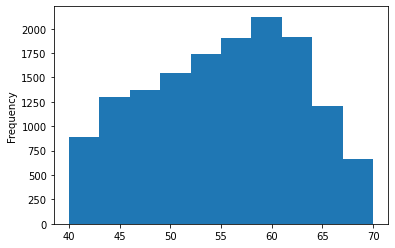

In [25]:
dfd['21003-0.0'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

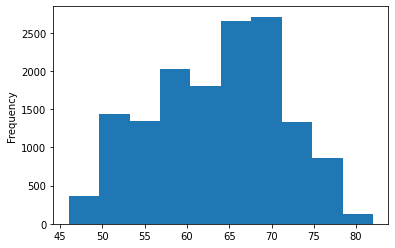

In [26]:
dfd['21003-2.0'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

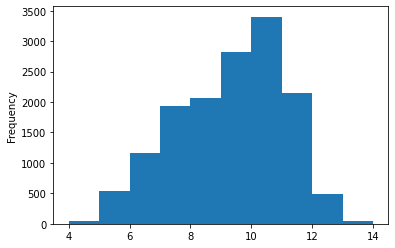

In [27]:
dfd_diff = dfd['21003-2.0']-dfd['21003-0.0']
dfd_diff.plot(kind='hist')

#### extract age/sex match control to disease group

In [30]:
# load pain group
dfp = pd.read_csv(os.path.join('..', 'funpack_cfg', 'qsidp_subjs_disease_visit2_extended.tsv'), sep='\t')

/home/fs0/syzhang/.conda/envs/biobank/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2446,2447,2448,2449,2450,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2561,2562,2563,2564,2565,2566,2567,2568,2569,2570,2571,2572,2573,2574,2575,2576,2577,2578,2579,2580,2581,2582,2583,2584,2585,2586,2587,2588,2589,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621,2622,2623,2624,2625,2626,2627,2628,2629,2740,2741,2742,2743,2744,2745,2746,2747,2748,2751,2821,2822,2823,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833,2834,2835,2836,2837,2838,2839,2840,2841,2842,2843,2844,2845,2846,2847,2848,2849,2850,2851,2852,2853,2854,2855,2856,2857,2858,2859,2860,2861,2862,2863,2864,2865,2866,2867,2868,2869,2870,2871,2872,2873,2874,2875,2876,2877,2878,2879,2880,2881,2882,2883,2884,2885,28

In [31]:
dfp.shape

(5047, 3797)

In [36]:
from clean_questions import extract_qs, load_qscode, exclude_multidisease, disease_label

In [38]:
# load disease
df_disease_label = disease_label(dfp, visits=[2], grouping='simplified')
# downsample df
df_qs = load_qscode(questionnaire='all', idp=None)
# extract questionnaire of interest
df_qs = extract_qs(dfp, df_questionnaire=df_qs, visits=[2])
# exclude multi diseases subjects
df_exclude, df_label_exclude = exclude_multidisease(df_qs, df_disease_label)

In [40]:
df_exclude.shape

(4380, 119)

In [47]:
dfp.set_index('eid', inplace=True)

In [48]:
dfp['eid'] = dfp.index

In [49]:
dfp_single = dfp.loc[df_exclude.index]

In [100]:
dfp_single_as = dfp_single[['31-0.0', '21003-2.0']]

In [102]:
dfp_single_as.reset_index(inplace=True)

<AxesSubplot:ylabel='Frequency'>

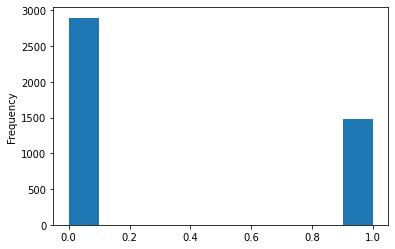

In [103]:
dfp_single_as['31-0.0'].plot(kind='hist') # 0-female, 1-male

<AxesSubplot:ylabel='Frequency'>

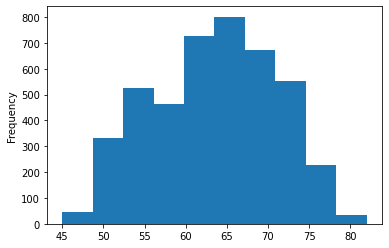

In [104]:
dfp_single_as['21003-2.0'].plot(kind='hist')

In [82]:
df_single_as = df[['31-0.0', '21003-2.0', 'eid']]

In [95]:
dfp_single_as

<bound method DataFrame.reset_index of          31-0.0  21003-2.0      eid
eid                                
1001416     1.0       67.0  1001416
1002910     1.0       59.0  1002910
1010078     1.0       62.0  1010078
1013470     0.0       62.0  1013470
1018785     0.0       55.0  1018785
...         ...        ...      ...
5697349     1.0       58.0  5697349
5801899     0.0       58.0  5801899
5802589     1.0       61.0  5802589
5807269     0.0       51.0  5807269
5878634     0.0       61.0  5878634

[4380 rows x 3 columns]>

In [110]:
# look up each pain subject to find match in control
# merge df
merge_df = df_single_as.merge(dfp_single_as, how='outer', left_on='eid', right_on='eid',
                   suffixes=('_control', '_disease'))

In [111]:
merge_df

,31-0.0_control,21003-2.0_control,eid,31-0.0_disease,21003-2.0_disease
0,1.0,74.0,1000108,NaN,NaN
1,0.0,52.0,1001121,NaN,NaN
2,1.0,49.0,1001143,NaN,NaN
3,0.0,61.0,1001192,NaN,NaN
4,1.0,69.0,1001289,NaN,NaN
...,...,...,...,...,...
19034,NaN,NaN,5697349,1.0,58.0
19035,NaN,NaN,5801899,0.0,58.0
19036,NaN,NaN,5802589,1.0,61.0
19037,NaN,NaN,5807269,0.0,51.0


In [112]:
merge_df.isna().sum()

31-0.0_control        4380
21003-2.0_control     4380
eid                      0
31-0.0_disease       14659
21003-2.0_disease    14659
dtype: int64

In [118]:
matched = []
for ip, rp in dfp_single_as.iterrows():
    flag = 0
    for ic, rc in df_single_as.iterrows():
        if rp['31-0.0']==rc['31-0.0'] and rp['21003-2.0']==rc['21003-2.0']:
            if rc['eid'] not in matched:
                matched.append(rc['eid'])
                break

KeyboardInterrupt: 

In [120]:
len(matched)

2251

#### extract digestive qs from controls

In [11]:
from clean_questions import extract_qs, load_qscode
qs = load_qscode(questionnaire='digestive', idp=None)
df_qs = extract_qs(df, df_questionnaire=qs, visits=[2])

In [12]:
df_qs['53-2.0'] = df['53-2.0']

In [13]:
df_qs.rename(columns={'53-2.0':'imaging_date', '21023-0.0':'digest_date'}, inplace=True)

In [14]:
# to dt
df_dt = pd.to_datetime(df_qs['digest_date'])
df_it = pd.to_datetime(df_qs['imaging_date'])
# calcualte diff
diff = (df_dt-df_it).values
dff = diff.astype('int64')

In [15]:
# those finished digestive after imaging
sum(dff>0)/len(dff)

0.26952725288218843

In [41]:
df_qualify = df_qs.iloc[dff>0]

In [42]:
df_qualify.shape

(3951, 12)

In [45]:
df_qualify['eid'].to_csv('../funpack_cfg/subjs_digestive_after_imaging.csv', header=None, index=None)

In [18]:
dfq = df_qualify[['21027-0.0', '21048-0.0', 'eid', '21052-0.0',
       '21051-0.0', '21049-0.0', '21025-0.0', '21036-0.0', '21057-0.0',
       '21035-0.0']]

In [19]:
dfq.dropna().shape[0]

669

In [20]:
df_qualify.shape[0]

3951

In [21]:
669/3951

0.16932422171602127

In [22]:
dfqd = dfq.dropna()

In [23]:
dfqd[dfqd['21048-0.0']==-600]

,21027-0.0,21048-0.0,eid,21052-0.0,21051-0.0,21049-0.0,21025-0.0,21036-0.0,21057-0.0,21035-0.0
12,0.0,-600.0,1003203,-600.0,-600.0,-600.0,4.0,3.0,-600.0,1.0
14,1.0,-600.0,1003357,-600.0,-600.0,-601.0,3.0,2.0,-818.0,1.0
41,0.0,-600.0,1012615,-600.0,-600.0,-601.0,3.0,3.0,-313.0,1.0
58,0.0,-600.0,1020059,-600.0,-601.0,-600.0,3.0,8.0,-600.0,1.0
88,0.0,-600.0,1028995,-600.0,-600.0,-600.0,2.0,6.0,-600.0,1.0
...,...,...,...,...,...,...,...,...,...,...
14459,0.0,-600.0,5960820,-601.0,-600.0,-600.0,3.0,2.0,-600.0,1.0
14484,1.0,-600.0,5968078,-600.0,-600.0,-600.0,5.0,5.0,-600.0,1.0
14495,1.0,-600.0,5971893,-600.0,-600.0,-601.0,3.0,7.0,-313.0,1.0
14625,1.0,-600.0,6014473,-600.0,-600.0,-600.0,3.0,5.0,-313.0,1.0


In [33]:
# include bothered a little
df_cut = df_qualify.loc[(df_qualify['21027-0.0']==1) | (df_qualify['21035-0.0']==1)
              | (df_qualify['21048-0.0']!=-600) | (df_qualify['21052-0.0']!=-600)
               | (df_qualify['21051-0.0']!=-600)  | (df_qualify['21049-0.0']!=-600)
               | (df_qualify['21057-0.0']!=-600)]

In [34]:
df_cut.shape

(3372, 12)

In [100]:
# only include bothered a lot
df_cut = df_qualify.loc[(df_qualify['21027-0.0']==1) | (df_qualify['21035-0.0']==1)
              | (df_qualify['21048-0.0']==-602) | (df_qualify['21052-0.0']==-602)
               | (df_qualify['21051-0.0']==-602)  | (df_qualify['21049-0.0']==-602)
               | (df_qualify['21057-0.0']==-602)]

In [72]:
# only include bothered a lot
tmp = [(df_qualify['21027-0.0']==1) | (df_qualify['21035-0.0']==1)
              | (df_qualify['21048-0.0']==-602) | (df_qualify['21052-0.0']==-602)
               | (df_qualify['21051-0.0']==-602)  | (df_qualify['21049-0.0']==-602)
               | (df_qualify['21057-0.0']==-602)][0]

In [75]:
tmp.astype(int)

eid
1001143    1
1002039    0
1002393    1
1002884    1
1003045    0
          ..
6020171    0
6020209    1
6022107    0
6023724    0
6023887    1
Length: 3951, dtype: int64

In [62]:
df_cut.shape

(1235, 11)

In [47]:
df_cut.set_index('eid', inplace=True)

In [52]:
df_qualify.set_index('eid', inplace=True)

In [53]:
ff = df_qualify.loc[df_cut.index]

In [60]:
df_cut.index.to_list() in df_qualify.index.to_list()

False

In [78]:
df['25811-2.0']

0        3707.82
1        5873.47
2        3395.34
3        3532.01
4        4105.01
          ...   
14654    6539.13
14655    3942.72
14656    3743.67
14657    3654.12
14658    4075.38
Name: 25811-2.0, Length: 14659, dtype: float64

In [82]:
df['25488-2.0'].isna().sum()

848

In [91]:
df['25489-2.0']

0        0.430498
1        0.430462
2        0.418746
3        0.388881
4        0.405593
           ...   
14654         NaN
14655    0.364049
14656    0.446413
14657    0.400722
14658    0.410239
Name: 25489-2.0, Length: 14659, dtype: float64

In [92]:
df['25057-2.0']

0        0.363166
1        0.421552
2        0.451844
3        0.377155
4        0.352406
           ...   
14654         NaN
14655    0.385815
14656    0.378166
14657    0.431482
14658    0.421220
Name: 25057-2.0, Length: 14659, dtype: float64

In [99]:
'25761-' in df.columns

False